In [2]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import torch

#path define
MODEL_PATH = "./model/sam_vit_h_4b8939.pth"
MODEL_ARCH = "vit_h"
TEST_IMAGE_PATH = "../data/Mori_SkinRegen_Image/test_hihu.jpg"

# GPUチェック
print(torch.cuda.is_available())  # TrueならOK
print(torch.cuda.device_count())  # 利用可能なGPUの数
print(torch.cuda.get_device_name(0))  # GPUの名前

# モデルの読み込み
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = sam_model_registry[MODEL_ARCH](checkpoint=MODEL_PATH)
sam.to(device)  # GPUに送る

True
2
Quadro GV100


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

Test Image

In [3]:
img = cv2.imread(TEST_IMAGE_PATH)
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(img)

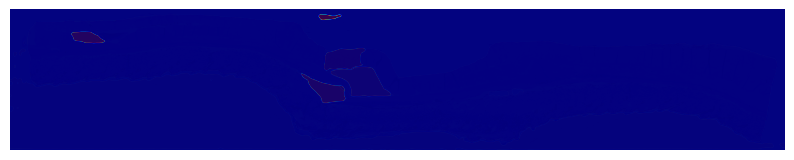

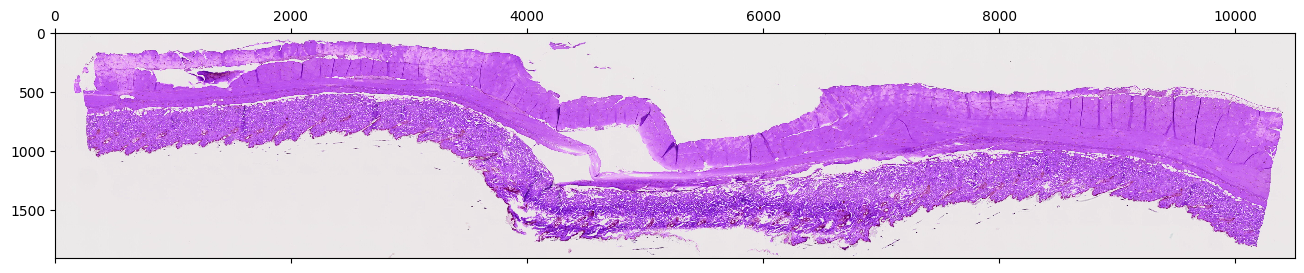

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

# マスクを可視化
def show_anns(masks, img):
    if len(masks) == 0:
        return

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    sorted_masks = sorted(masks, key=lambda x: x['area'], reverse=True)  # 面積順にソート
    for mask in sorted_masks:
        mask_img = mask["segmentation"]
        color = np.random.rand(3)  # ランダムな色
        plt.imshow(mask_img, cmap='jet', alpha=0.4)  # 透明度を持たせてオーバーレイ
    plt.axis("off")
    plt.show()

show_anns(masks, img)

plt.matshow(img)